In [1]:
# Manipulations standard
import geopandas as gpd
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Pour la basemap
import contextily as cx
# Autres
import os
# Potentiel solaire package
from potentiel_solaire.constants import DATA_FOLDER

# Acquisition des données

## En commencant par le territoire à couvrir

C:\Users\matth\AppData\Local\Temp\ipykernel_18012\2162312035.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
C:\Users\matth\AppData\Local\Temp\ipykernel_18012\2162312035.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


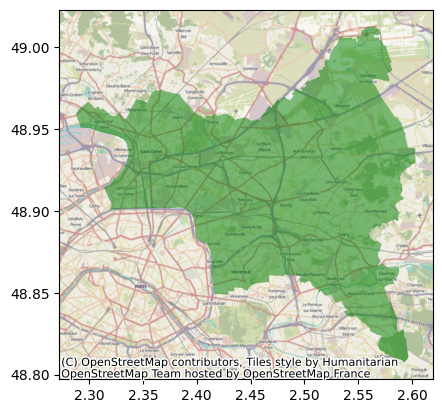

In [2]:
dpts = gpd.read_file(DATA_FOLDER / "contour-des-departements.geojson").to_crs(4326)
ShapeNT = dpts[dpts.code == "93"].geometry
fig, ax = plt.subplots()
dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## On load les écoles

In [3]:
# Takes 58s on my laptop
annuaire = gpd.read_file(DATA_FOLDER / 'fr-en-annuaire-education.geojson')
print(len(annuaire),"items")
annuaire = annuaire[annuaire.code_postal.str.startswith("93")]
print(len(annuaire),"objets dans le 93")
annuaire = annuaire.to_crs(4326)
annuaire.head(3)

69645 items
1432 objets dans le 93


identifiant_de_l_etablissement           nom_etablissement  \
8652                       0931978V         Collège Victor Hugo   
8653                       0931428X           Collège Jean Vigo   
8656                       0931211L  Collège Marais de Villiers   

     type_etablissement statut_public_prive             adresse_1 adresse_2  \
8652            Collège              Public  2 allée Elsa Triolet      None   
8653            Collège              Public        2 rue de Nancy      None   
8656            Collège              Public       6 rue du Marais      None   

     adresse_3 code_postal code_commune       nom_commune  ...  \
8652      None       93160        93051    Noisy-le-Grand  ...   
8653      None       93800        93031  Epinay-sur-Seine  ...   
8656      None       93100        93048         Montreuil  ...   

     code_type_contrat_prive      pial etablissement_mere  \
8652                      99  0931978V               None   
8653                      99      None               None   
8656                      99      None               None   

      type_rattachement_etablissement_mere  code_circonscription  \
8652                                  None                  None   
8653                                  None              0932257Y   
8656                                  None                  None   

     code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
8652                            None                               None   
8653                            None                               None   
8656                            None                               None   

     code_bassin_formation    libelle_bassin_formation  \
8652                 24934  93 BASSIN 4 (DIST. 7 ET 8)   
8653                 24931  93 BASSIN 1 (DIST. 1 ET 2)   
8656                 24933  93 BASSIN 3 (DIST. 5 ET 6)   

                      geometry  
8652  POINT (2.55699 48.83847)  
8653  POINT (2.29993 48.95655)  
8656   POINT (2.4338 48.86953)  

[3 rows x 73 columns]

## On load la BDTOPO

In [4]:
import fiona

Vérifions quelles sont les layers de dispo dans le gpkg

In [5]:
GPKG = DATA_FOLDER / "BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg"
layers = fiona.listlayers(GPKG)
print(" ".join(layers))

troncon_de_route route_numerotee_ou_nommee itineraire_autre troncon_de_voie_ferree equipement_de_transport piste_d_aerodrome aerodrome point_de_repere non_communication point_du_reseau voie_ferree_nommee toponymie_transport batiment cimetiere construction_lineaire construction_ponctuelle construction_surfacique reservoir ligne_orographique pylone terrain_de_sport toponymie_bati cours_d_eau troncon_hydrographique bassin_versant_topographique plan_d_eau surface_hydrographique noeud_hydrographique detail_hydrographique toponymie_hydrographie zone_d_habitation lieu_dit_non_habite detail_orographique toponymie_lieux_nommes canalisation ligne_electrique poste_de_transformation erp zone_d_activite_ou_d_interet toponymie_services_et_activites voie_nommee parc_ou_reserve foret_publique toponymie_zones_reglementees haie zone_de_vegetation arrondissement arrondissement_municipal commune epci collectivite_territoriale departement region adresse_ban batiment_rnb_lien_bdtopo lien_adresse_vers_bdtopo

Et on les display

In [6]:
bats = gpd.read_file(GPKG, layer="batiment")# toponymie_services_et_activites
bats = bats.to_crs(4326) 

In [7]:
bats.columns

Index(['cleabs', 'nature', 'usage_1', 'usage_2', 'construction_legere',
       'etat_de_l_objet', 'date_creation', 'date_modification',
       'date_d_apparition', 'date_de_confirmation', 'sources',
       'identifiants_sources', 'methode_d_acquisition_planimetrique',
       'methode_d_acquisition_altimetrique', 'precision_planimetrique',
       'precision_altimetrique', 'nombre_de_logements', 'nombre_d_etages',
       'materiaux_des_murs', 'materiaux_de_la_toiture', 'hauteur',
       'altitude_minimale_sol', 'altitude_minimale_toit',
       'altitude_maximale_toit', 'altitude_maximale_sol',
       'origine_du_batiment', 'appariement_fichiers_fonciers',
       'identifiants_rnb', 'geometry'],
      dtype='object')

13348 items
1385 items dans la zone


C:\Users\matth\AppData\Local\Temp\ipykernel_18012\2806925089.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
C:\Users\matth\AppData\Local\Temp\ipykernel_18012\2806925089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


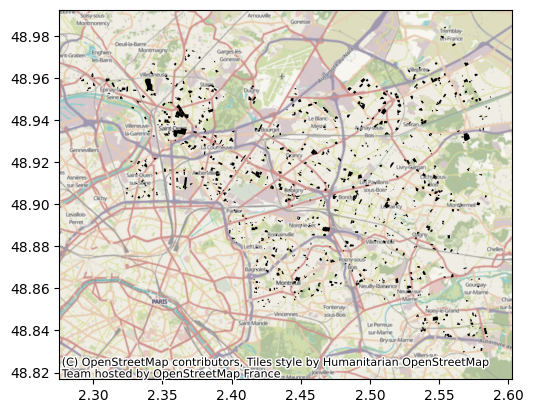

In [8]:
# Takes 10s on my laptop
bdedu = gpd.read_file(GPKG, layer="zone_d_activite_ou_d_interet")# toponymie_services_et_activites
print(len(bdedu),"items")
# Utilisons les memes projections
bdedu = bdedu.to_crs(4326) 
# Tri sur la catégorie d'intéret
bdedu = bdedu[bdedu["categorie"] == "Science et enseignement"] 
bdedu = gpd.sjoin(bdedu, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdedu),"items dans la zone")

fig, ax = plt.subplots()
bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()


In [9]:
bat_edu = gpd.sjoin(gpd.GeoDataFrame(bats[["cleabs","geometry","identifiants_rnb","materiaux_de_la_toiture","hauteur"]],geometry="geometry"), gpd.GeoDataFrame(bdedu[["cleabs","toponyme","geometry"]],geometry="geometry"), how='left').dropna(subset="toponyme")
bat_edu.head(3)

cleabs_left  \
1699  BATIMENT0000000002599800   
1771  BATIMENT0000000002600955   
1772  BATIMENT0000000002600963   

                                               geometry  \
1699  MULTIPOLYGON Z (((2.55395 48.98409 82.5, 2.553...   
1771  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.3772 ...   
1772  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.37734...   

               identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
1699  A12MR4AER8XA/H3V9FEZVTCQH                    None      7.9       8101.0   
1771               GMKNQX3Q3AY4                    None     11.4       9799.0   
1772               FWK5CQ31Y968                             11.3       9799.0   

                  cleabs_right                         toponyme  
1699  SURFACTI0000000002555409  I.M.E. B. Guillez le Petit Orme  
1771  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin  
1772  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin

On peut aussi afficher les réseaux

C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\pyogrio\geopandas.py:265: UserWarnin

188015 items
68497 items


C:\Users\matth\AppData\Local\Temp\ipykernel_18012\1883887287.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
C:\Users\matth\AppData\Local\Temp\ipykernel_18012\1883887287.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


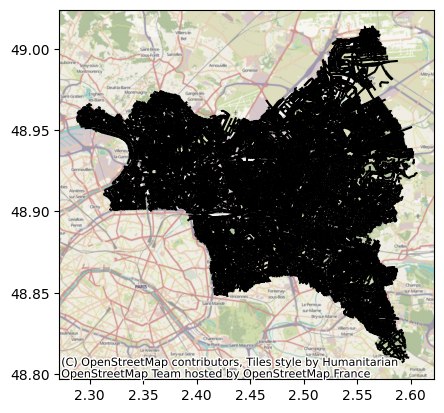

In [10]:
# Takes 80s on my laptop -- loading roads in this case
bdtopo = gpd.read_file(GPKG)
print(len(bdtopo),"items")
# Utilisons les memes projections
bdtopo = bdtopo.to_crs(4326)
bdtopo = gpd.sjoin(bdtopo, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdtopo),"items")
fig, ax = plt.subplots()
bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Et on load des batiments du dataset Parcellaire

In [11]:
# Takes 11s on my laptop
pci = gpd.read_file(DATA_FOLDER / "PARCELLAIRE-EXPRESS_1-1__SHP_LAMB93_D093_2024-10-01/PARCELLAIRE-EXPRESS/1_DONNEES_LIVRAISON_2024-11-00210/PEPCI_1-1_SHP_LAMB93_D093/BATIMENT.SHP")
print(len(pci),"items")
pci = pci.to_crs(4326)
pci = gpd.sjoin(pci, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(pci),"items - sorted")
pci.head(3)

376574 items
376220 items - sorted


TYPE                                           geometry  \
0  Construction légère  POLYGON ((2.39066 48.90535, 2.3907 48.90536, 2...   
1      Bâtiment en dur  POLYGON ((2.52665 48.87779, 2.52669 48.87777, ...   
2      Bâtiment en dur  POLYGON ((2.52583 48.87706, 2.52582 48.87706, ...   

   index_right code                nom  
0         93.0   93  Seine-Saint-Denis  
1         93.0   93  Seine-Saint-Denis  
2         93.0   93  Seine-Saint-Denis

# Prenons une école

In [12]:
pd.DataFrame(annuaire.iloc[0])

8652
identifiant_de_l_etablissement                                          0931978V
nom_etablissement                                            Collège Victor Hugo
type_etablissement                                                       Collège
statut_public_prive                                                       Public
adresse_1                                                   2 allée Elsa Triolet
...                                                                          ...
code_zone_animation_pedagogique                                             None
libelle_zone_animation_pedagogique                                          None
code_bassin_formation                                                      24934
libelle_bassin_formation                              93 BASSIN 4 (DIST. 7 ET 8)
geometry                            POINT (2.5569932622250633 48.83847315768288)

[73 rows x 1 columns]

In [13]:
# Filtrons autour de d = 100m
d = 0.02 # échelle à retrouver
zone = annuaire.iloc[0].geometry.buffer(d)

#### On coupe ce qu'il y a à l'intérieur de la zone d'intéret

In [14]:
bdtopo_d = bdtopo[bdtopo.geometry.within(zone)].clip(zone)# check with within
pci_d = pci[pci.geometry.within(zone)].clip(zone)# check with within
bdedu_d = bdedu[bdedu.geometry.within(zone)].clip(zone)# check with within
bat_edu_d =  bat_edu[bat_edu.geometry.within(zone)].clip(zone)

C:\Users\matth\AppData\Local\Temp\ipykernel_18012\3993707997.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
C:\Users\matth\AppData\Local\Temp\ipykernel_18012\3993707997.py:7: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")


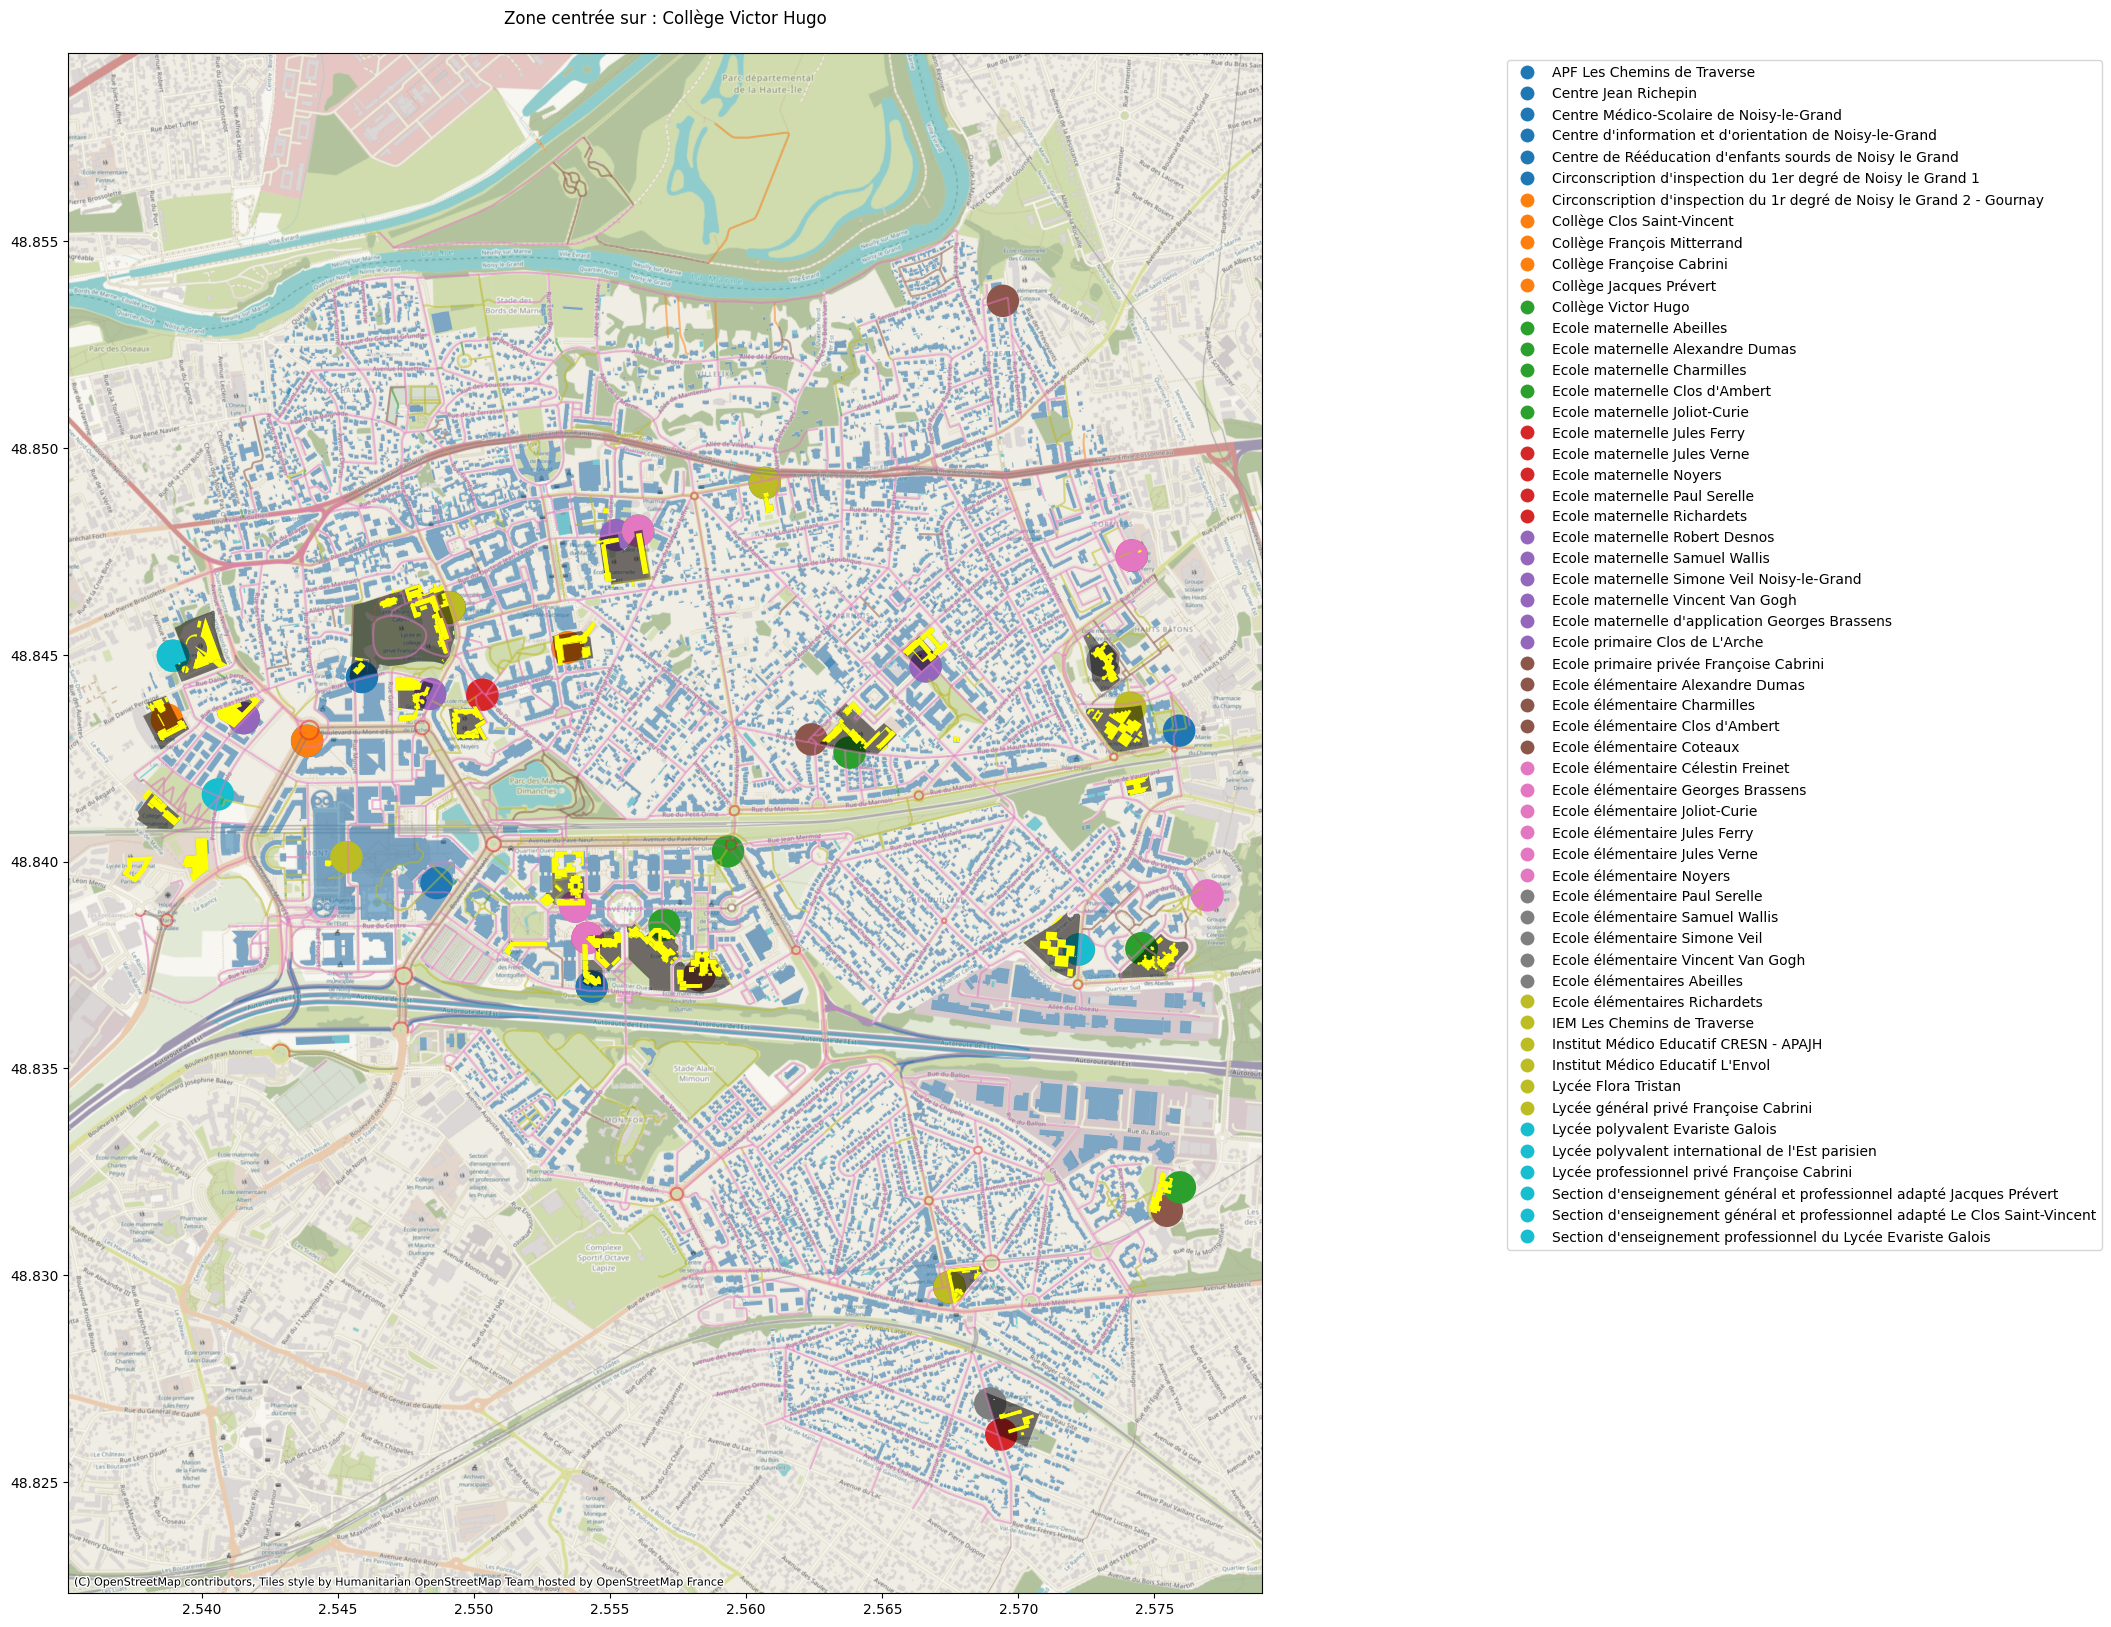

<Figure size 640x480 with 0 Axes>

In [15]:
#plots all dans la zone sélectionnée
fig, ax = plt.subplots(figsize=(20,20))
pci_d.plot(column="TYPE", legend=True, categorical = True, ax = ax, alpha=0.5)
bdtopo_d.plot(column="nature",legend=True, categorical = True, ax = ax, alpha=0.5)
annuaire[annuaire.geometry.within(zone)].clip(zone).plot(column = "nom_etablissement",legend=True, categorical = True, ax = ax, markersize=500, legend_kwds={'loc': 'upper left'})
bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")
cx.add_basemap(ax, crs=pci_d.crs, zoom=16) # source=cx.providers.OpenStreetMap.Mapnik,
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0, 0, 1))
ax.set_title("Zone centrée sur : "+annuaire.iloc[0].nom_etablissement+"\n")
plt.show()
plt.savefig("preview_example.jpg")

# Explorons comment segmenter ces donnés

In [16]:
from shapely.ops import nearest_points

In [17]:
# On s'intéresse à : bdedu_d, bat_edu_d
ecoles = annuaire[annuaire.geometry.within(zone)]
ecoles.head(3)

identifiant_de_l_etablissement            nom_etablissement  \
8652                        0931978V          Collège Victor Hugo   
8664                        0932333F  Collège François Mitterrand   
10815                       0931614Z      Collège Jacques Prévert   

      type_etablissement statut_public_prive                 adresse_1  \
8652             Collège              Public      2 allée Elsa Triolet   
8664             Collège              Public       29 avenue Montaigne   
10815            Collège              Public  22 rue de la Butte Verte   

      adresse_2 adresse_3 code_postal code_commune     nom_commune  ...  \
8652       None      None       93160        93051  Noisy-le-Grand  ...   
8664       None      None       93160        93051  Noisy-le-Grand  ...   
10815      None      None       93160        93051  Noisy-le-Grand  ...   

      code_type_contrat_prive      pial etablissement_mere  \
8652                       99  0931978V               None   
8664                       99  0932333F               None   
10815                      99      None               None   

       type_rattachement_etablissement_mere  code_circonscription  \
8652                                   None                  None   
8664                                   None                  None   
10815                                  None                  None   

      code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
8652                             None                               None   
8664                             None                               None   
10815                            None                               None   

      code_bassin_formation    libelle_bassin_formation  \
8652                  24934  93 BASSIN 4 (DIST. 7 ET 8)   
8664                  24934  93 BASSIN 4 (DIST. 7 ET 8)   
10815                 24934  93 BASSIN 4 (DIST. 7 ET 8)   

                       geometry  
8652   POINT (2.55699 48.83847)  
8664   POINT (2.53871 48.84343)  
10815  POINT (2.57222 48.83787)  

[3 rows x 73 columns]

In [18]:
recollement = gpd.sjoin_nearest(ecoles, bdedu_d, distance_col="distances", lsuffix="e_", rsuffix="f_", exclusive=True)[["identifiant_de_l_etablissement","nom_etablissement","distances","toponyme","cleabs","nature","nature_detaillee"]]
recollement.head(3)

C:\Users\matth\AppData\Local\pypoetry\Cache\virtualenvs\potentiel-solaire-ccsyu8q1-py3.11\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


identifiant_de_l_etablissement            nom_etablissement  distances  \
8652                        0931978V          Collège Victor Hugo   0.000122   
8664                        0932333F  Collège François Mitterrand   0.000000   
10815                       0931614Z      Collège Jacques Prévert   0.000043   

                          toponyme                    cleabs   nature  \
8652           Collège Victor Hugo  SURFACTI0000000002556168  Collège   
8664   Collège François Mitterrand  SURFACTI0000000244843955  Collège   
10815      Collège Jacques Prévert  SURFACTI0000000002556166  Collège   

      nature_detaillee  
8652              None  
8664              None  
10815             None

0.00023931998042532493


<Axes: >

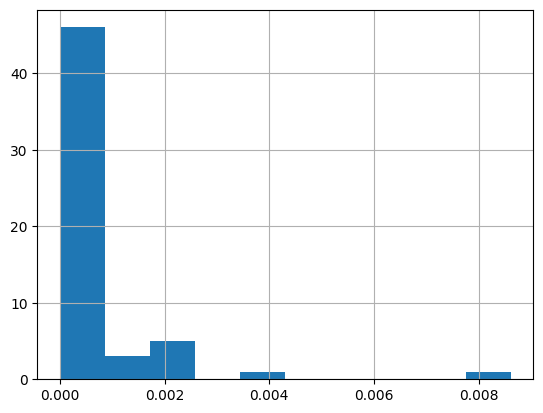

In [19]:
seuil_recol = recollement.distances.quantile(q=0.7)
print(seuil_recol)
recollement.distances.hist()

In [20]:
recollement = recollement[recollement.distances < seuil_recol]
bdedu_areas = recollement.toponyme.unique()
bdedu_r = bdedu[bdedu.toponyme.isin(bdedu_areas)]
recollement.head(3)

identifiant_de_l_etablissement            nom_etablissement  distances  \
8652                        0931978V          Collège Victor Hugo   0.000122   
8664                        0932333F  Collège François Mitterrand   0.000000   
10815                       0931614Z      Collège Jacques Prévert   0.000043   

                          toponyme                    cleabs   nature  \
8652           Collège Victor Hugo  SURFACTI0000000002556168  Collège   
8664   Collège François Mitterrand  SURFACTI0000000244843955  Collège   
10815      Collège Jacques Prévert  SURFACTI0000000002556166  Collège   

      nature_detaillee  
8652              None  
8664              None  
10815             None

# Test sur une ecole

C:\Users\matth\AppData\Local\Temp\ipykernel_18012\742129815.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
C:\Users\matth\AppData\Local\Temp\ipykernel_18012\742129815.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

TypeError: 'GeometryArray' with dtype geometry does not support reduction 'sum'

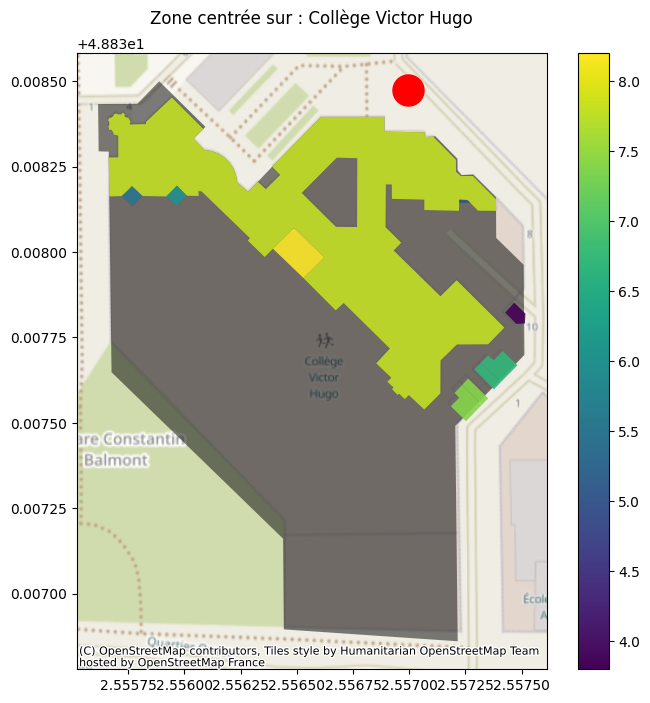

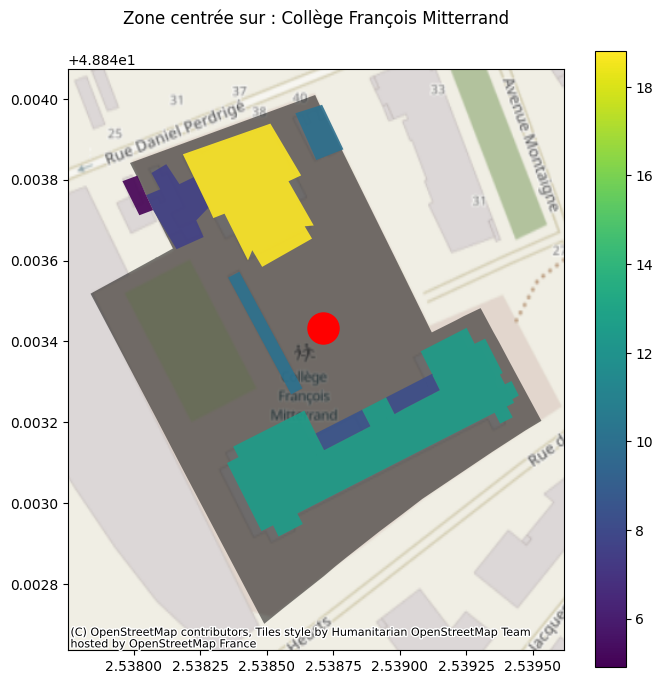

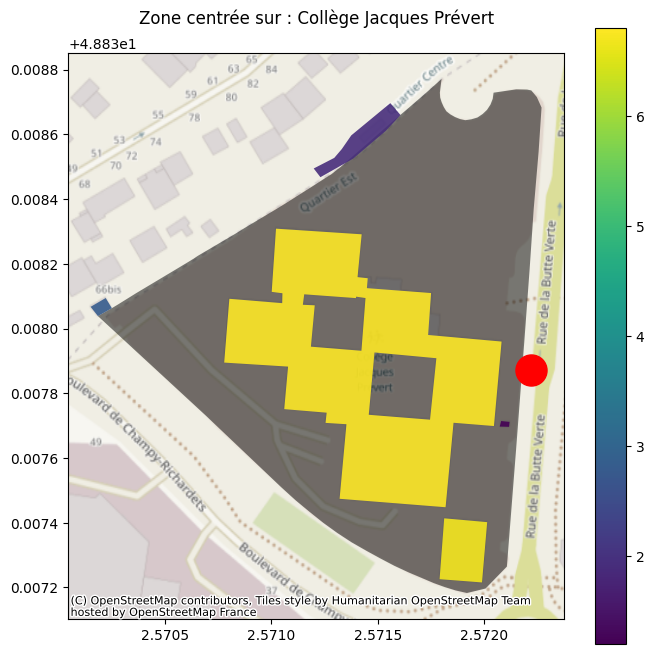

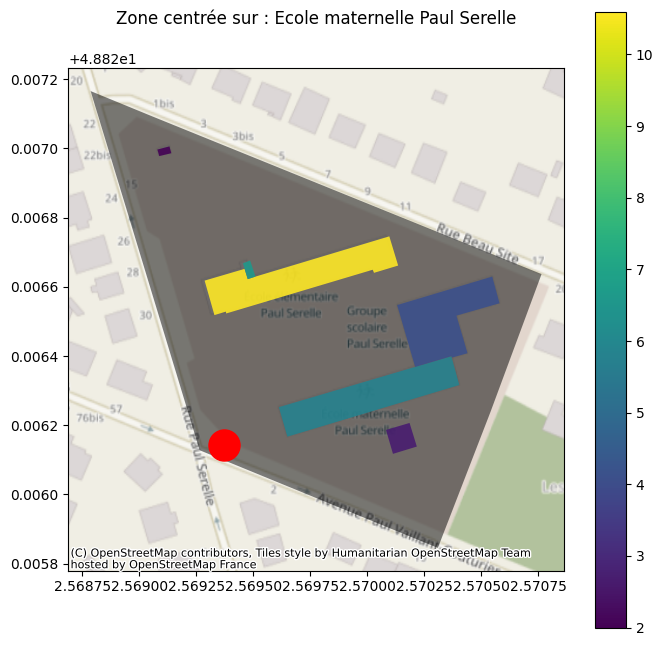

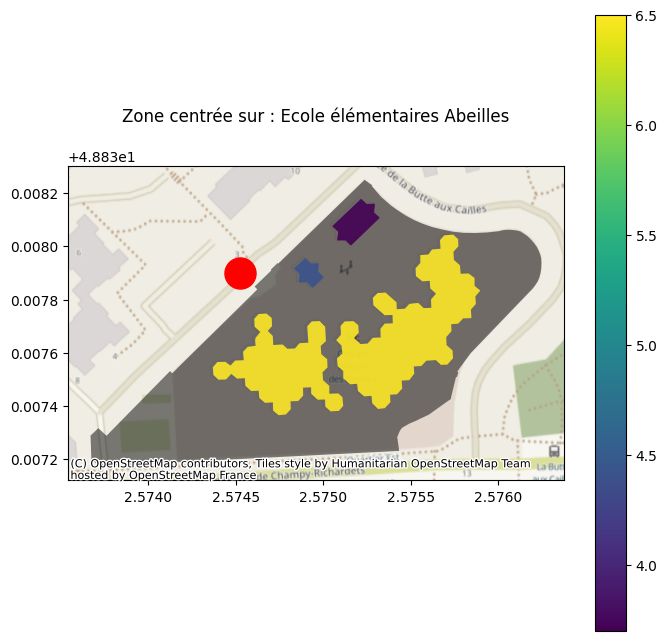

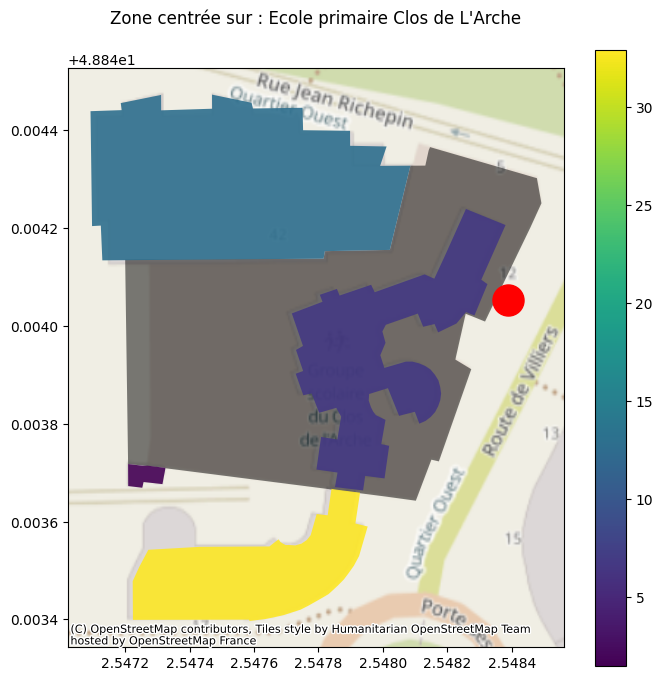

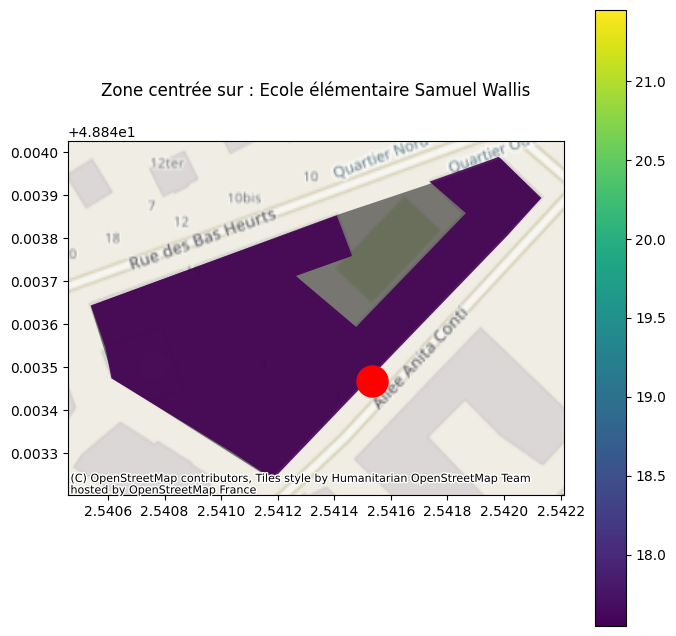

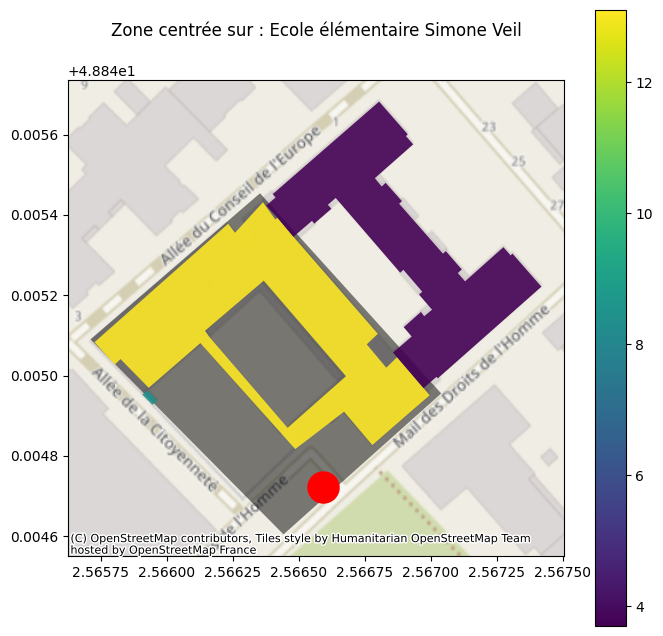

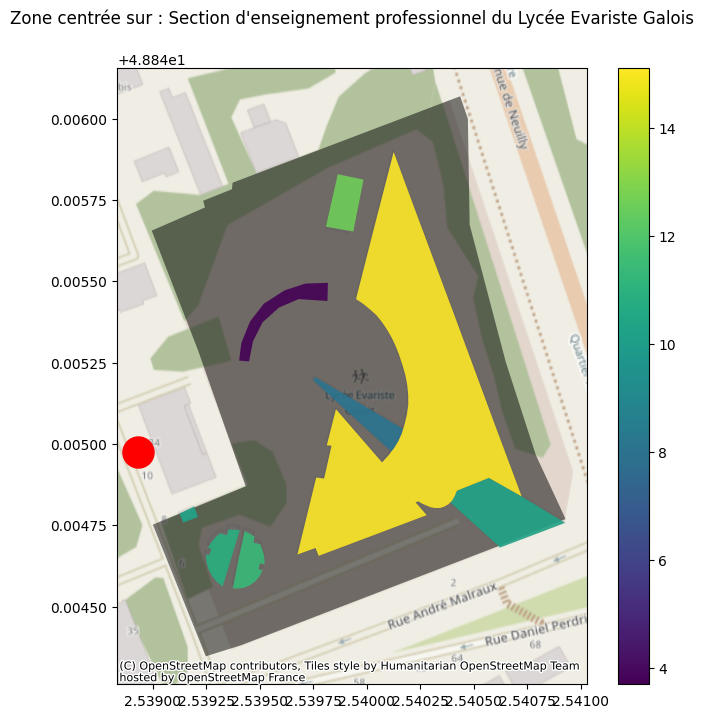

In [21]:
documentation = "# Example de liste d'écoles\n\n"
for id_ecole in recollement["identifiant_de_l_etablissement"].unique():

    ecole = ecoles[ecoles.identifiant_de_l_etablissement == id_ecole]
    documentation +="## "+ecole.iloc[0]["nom_etablissement"]+"\n\n" + \
        "* Type etablissement: "+ecole.iloc[0]["type_etablissement"] +"\n"+ \
        "* adresse_1: "+ecole.iloc[0]["adresse_1"] +"\n"+ \
        "* nom_commune: "+ecole.iloc[0]["nom_commune"] +"\n"+ \
        "* identifiant_de_l_etablissement: "+ecole.iloc[0]["identifiant_de_l_etablissement"] +"\n"
    match = recollement[recollement.identifiant_de_l_etablissement == id_ecole]
    zone = ecole.iloc[0].geometry.buffer(0.01)
    bdedu_s = bdedu[bdedu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s = bat_edu[bat_edu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
    geod = bat_edu_s.crs.get_geod()
    bat_edu_s["area_m2"] = bat_edu_s.geometry.apply(lambda g: abs(geod.geometry_area_perimeter(g)[0]))
    documentation += "* Surface totale: "+str(int(bat_edu_s.area_m2.sum())) +"m2\n\n"
    if os.path.isfile("images/"+id_ecole+".jpg"):
        pass
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
        bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
        ecole.plot(color="red", ax = ax, markersize=500)
        cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
        ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
        plt.savefig("images/"+id_ecole+".jpg")

    documentation += "### Image\n\n![]("+ecole.iloc[0]["identifiant_de_l_etablissement"]+".jpg)\n\n"

with open("images/Readme.md", "w") as f:
    f.write(documentation)